<a href="https://colab.research.google.com/github/Shivam-Shrivastav/Cotton-Plant-Disease-Classifier/blob/main/CottonPlantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Project: Cotton Plant Disease Prediction &amp; Get Cure AI App - IAIP
 
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
 
keras.__version__

'2.4.3'

In [ ]:
train_data_path = '/content/drive/My Drive/data/train'
validation_data_path = '/content/drive/My Drive/data/val'

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
 
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels
 
training_data.class_indices

Found 1951 images belonging to 4 classes.


{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [ ]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)
 
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


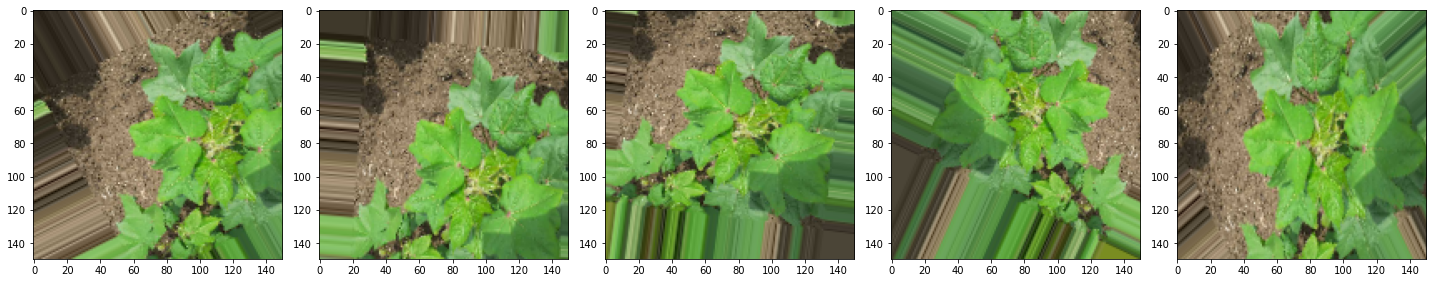

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
model_path = '/content/drive/My Drive/v3_red_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])

In [ ]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 

In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=20, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06
 

Epoch 1/20
61/61 [==============================] - ETA: 0s - loss: 1.2362 - accuracy: 0.4408 
Epoch 00001: val_accuracy improved from -inf to 0.50617, saving model to /content/drive/My Drive/v3_red_cott_dis.h5
61/61 [==============================] - 893s 15s/step - loss: 1.2362 - accuracy: 0.4408 - val_loss: 1.0752 - val_accuracy: 0.5062
Epoch 2/20
61/61 [==============================] - ETA: 0s - loss: 1.0399 - accuracy: 0.5530
Epoch 00002: val_accuracy improved from 0.50617 to 0.51235, saving model to /content/drive/My Drive/v3_red_cott_dis.h5
61/61 [==============================] - 120s 2s/step - loss: 1.0399 - accuracy: 0.5530 - val_loss: 1.0478 - val_accuracy: 0.5123
Epoch 3/20
61/61 [==============================] - ETA: 0s - loss: 0.9225 - accuracy: 0.6069
Epoch 00003: val_accuracy improved from 0.51235 to 0.61420, saving model to /content/drive/My Drive/v3_red_cott_dis.h5
61/61 [==============================] - 119s 2s/step - loss: 0.9225 - accuracy: 0.6069 - val_loss: 0.

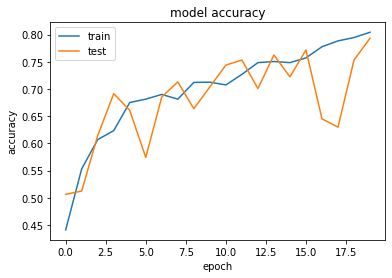

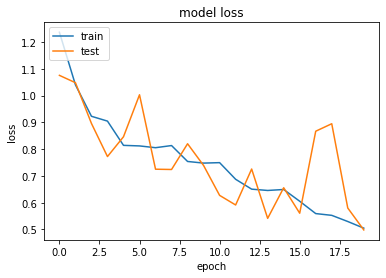

{'accuracy': [0.4407995939254761,
  0.5530497431755066,
  0.6068682670593262,
  0.6232700943946838,
  0.6750384569168091,
  0.6811891198158264,
  0.6899026036262512,
  0.6811891198158264,
  0.7119426131248474,
  0.712455153465271,
  0.7073295712471008,
  0.7268067598342896,
  0.7483341693878174,
  0.7503843903541565,
  0.7483341693878174,
  0.7570476531982422,
  0.7775499820709229,
  0.7883136868476868,
  0.7944643497467041,
  0.8042029738426208],
 'loss': [1.236191987991333,
  1.0399452447891235,
  0.9224901795387268,
  0.9044603109359741,
  0.8139570355415344,
  0.8118450045585632,
  0.8052283525466919,
  0.8132245540618896,
  0.7538247108459473,
  0.7477370500564575,
  0.7494150400161743,
  0.6873443126678467,
  0.6504925489425659,
  0.6456096172332764,
  0.6491907835006714,
  0.6053629517555237,
  0.5592848658561707,
  0.5527105927467346,
  0.5297133922576904,
  0.5048733353614807],
 'val_accuracy': [0.5061728358268738,
  0.5123456716537476,
  0.6141975522041321,
  0.69135802984237

In [ ]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
history.history